In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.svm  import SVC

In [ ]:
# Using Google Drive to load in Breast Cancer Detection Dataset
# Must mount drive to properly load in data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS4641-CancerDetection/breast-cancer-wisconsin.data',sep=',',names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                                                              'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                                                              'Normal Nucleoli','Mitoses','Class'])

## Exploratory Data Analysis (EDA)

## Info & Describe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Although there is no non-null data, there are a few datapoints contained within the Bare-Nuclei column which still need to be filtered. The Bare-Nuclei Columns include noisy data in the form of "?"

## Inspect first few Datapoints

In [ ]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Plot a few of the features to check for skewed or noisy data

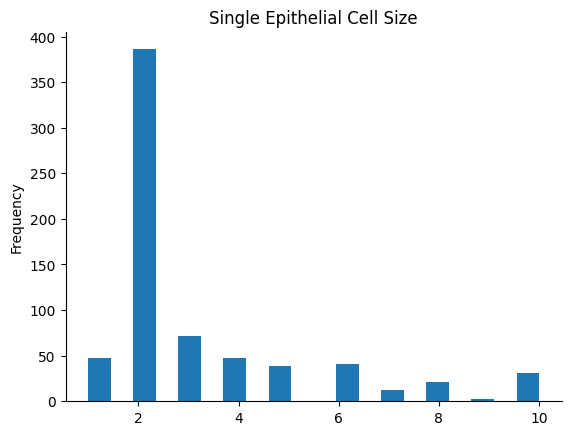

In [ ]:
df['Single Epithelial Cell Size'].plot(kind='hist', bins=20, title='Single Epithelial Cell Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

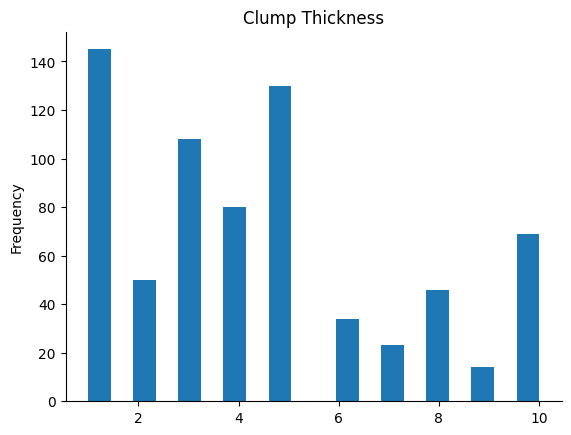

In [ ]:
df['Clump Thickness'].plot(kind='hist', bins=20, title='Clump Thickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

## NON-Numeric Noisy Values

#### Bare Nuclei contains '?'
#### Remove question marks to clean noise

In [ ]:
(df['Bare Nuclei']=='?').sum()

16

In [ ]:
df['Bare Nuclei'].value_counts()

,count
Bare Nuclei,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
?,16
9,9


Replacing question mark data with null values to make it easier to filter and drop null rows


In [ ]:
df['Bare Nuclei']=df['Bare Nuclei'].replace('?',np.nan)

In [ ]:
df['Bare Nuclei'].isna().sum()

16

To clean the dataset, we drop all null-values from Bare Nuclei column. The result will be held in a new clean dataset

In [ ]:
df_clean=df[['Bare Nuclei']].dropna()
df_clean= df_clean.astype('int')
df_clean.describe()

,Bare Nuclei
count,683.000000
mean,3.544656
std,3.643857
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,10.000000


## Interpolate NAN values with Mean of Bare Nuclei



In [ ]:
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df_clean['Bare Nuclei'].mean())

All null values removed, data clean of noise and replaced with mean of feature

In [ ]:
df['Bare Nuclei'].isna().sum()

0

Convert Bare Nuclei column to integer type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


## Drop Duplicate Datapoints

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           691 non-null    int64
 1   Clump Thickness              691 non-null    int64
 2   Uniformity of Cell Size      691 non-null    int64
 3   Uniformity of Cell Shape     691 non-null    int64
 4   Marginal Adhesion            691 non-null    int64
 5   Single Epithelial Cell Size  691 non-null    int64
 6   Bare Nuclei                  691 non-null    int64
 7   Bland Chromatin              691 non-null    int64
 8   Normal Nucleoli              691 non-null    int64
 9   Mitoses                      691 non-null    int64
 10  Class                        691 non-null    int64
dtypes: int64(11)
memory usage: 64.8 KB


Use Seaborn to plot heatmap, showing which features are highly correlated

<Axes: >

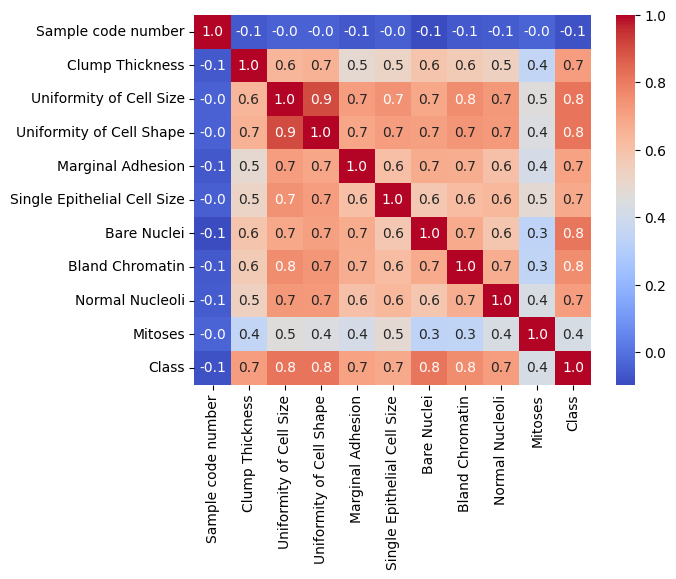

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='0.1f')

##### To Maximize Variance and Produce Simplest Dataset as inputs for model training, it is imperative to drop highly correlated columns. Dropping highly correlated columns will produce a dataset with the lowest number of features that still retain high information regarding Cancer Detection

In [ ]:
df=df.drop(columns=['Sample code number','Uniformity of Cell Size'],axis=1)

##### After dropping these columns, the heatmap visualization shows much less correlation between features, which means we not only have a simpler dataset to pass into the training of the model, but also maximized the variance ensuring that similar features were not used on the training.

<Axes: >

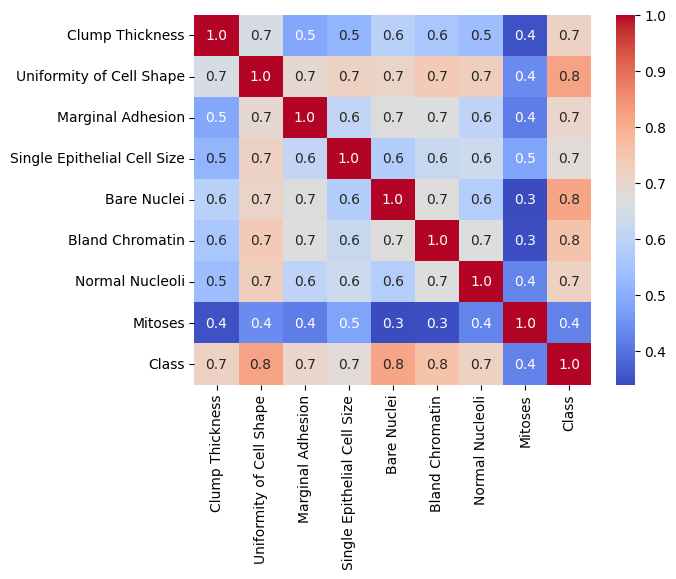

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='0.1f')

# Model Architechture and Training

We are implementing an SVM model using the Support Vector Classifier from SciKit-Learn to find best-fit hyperplane dividing datapoints of different classes

In [ ]:
feature = df.drop('Class',axis=1)
label = df['Class'].copy()

Use SciKit-Learn to split dataset into test and train segments

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feature, label, test_size=0.2, random_state=44, shuffle=True)
SVM_model = SVC(kernel='poly', probability=True)
SVM_model.fit(x_train,y_train)

SVC(kernel='poly', probability=True)

## Results and Evaluation

Accuracy: 0.9856
Cross Validation Scores:  [0.95495495 0.93693694 0.93636364 0.94545455 0.96363636]
Mean Cross Validation Score:  0.9474692874692874
F1 Score (Malignant as positive class): 0.9804


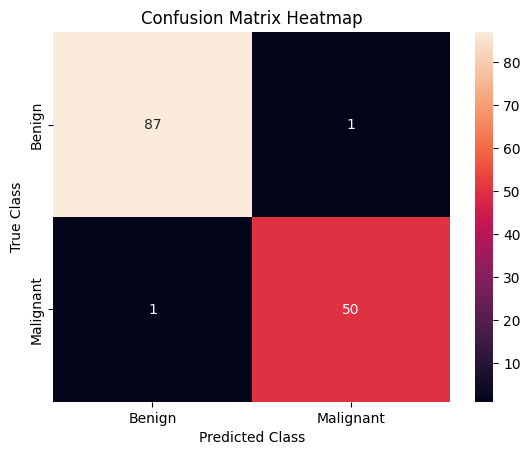

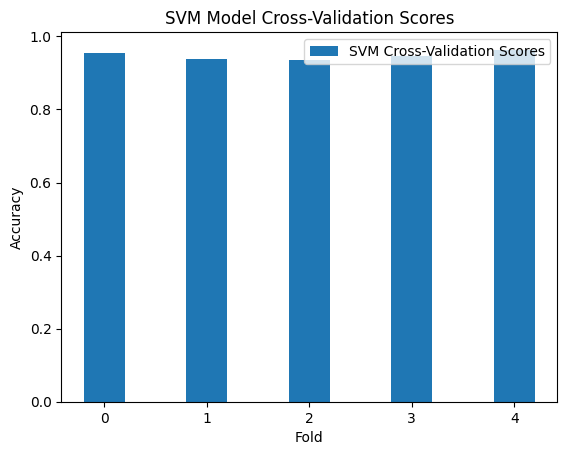

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score,
)
from sklearn.model_selection import cross_val_score

# Predictions and evaluation
y_pred = SVM_model.predict(x_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Cross Validation
svm_scores = cross_val_score(SVM_model, x_train, y_train, cv=5)
print("Cross Validation Scores: ", svm_scores)
print("Mean Cross Validation Score: ", svm_scores.mean())

# Additional Metrics Visualization
# F1 Score and Class Accuracy calculation
f1 = f1_score(y_test, y_pred, pos_label=4)  # Assuming '4' is malignant
print(f"F1 Score (Malignant as positive class): {f1:.4f}")

# Confusion Matrix SVM
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Bar Chart for Cross-Validation Scores
x_values = range(len(svm_scores))
plt.bar(x_values, svm_scores, width=0.4, label='SVM Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('SVM Model Cross-Validation Scores')
plt.legend()
plt.show()

### Random Forest Model

Import RandomForestClassifier from Sci-Kit Learn. Using train_test_split from Sci-Kit Learn to divide dataset into training and validation sets.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.20)
random_forest = RandomForestClassifier(n_estimators=100)
randomforest = random_forest.fit(X_train,y_train)
predictions = random_forest.predict(X_test)

### Evaluation of Random Forest Model

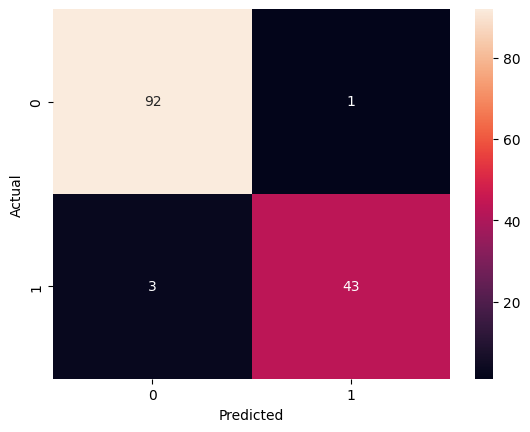

In [ ]:
# Random forest confusion matrix
cm =confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Metric Evaluation on Random Forest Classifier Model

In [ ]:
from sklearn.metrics import precision_score, roc_auc_score

# Predictions
predictions_proba = random_forest.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print(classification_report(y_test, predictions))

# Precision
precision = precision_score(y_test, predictions, pos_label=4) # Assuming 4 is the positive class
print(f"Precision (positive label 4): {precision:.4f}")

# F1-Score
f1 = f1_score(y_test, predictions, pos_label=4)
print(f"F1-Score (positive label 4): {f1:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, predictions_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9712
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        93
           4       0.98      0.93      0.96        46

    accuracy                           0.97       139
   macro avg       0.97      0.96      0.97       139
weighted avg       0.97      0.97      0.97       139

Precision (positive label 4): 0.9773
F1-Score (positive label 4): 0.9556
ROC AUC Score: 0.9974


### Logistic Regression Model

Replacing class values from 2 or 4 to 0 or 1

In [ ]:
df['Class'] = df['Class'].replace({2: 0, 4: 1})
df.head()

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df.drop("Class",axis=1),
                                                   df['Class'], test_size=0.20, random_state = 10)
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

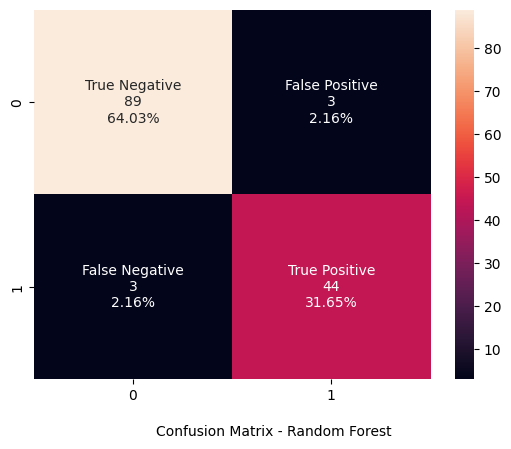

In [ ]:
lr_cf_matrix = confusion_matrix(y_test, lr_predictions)
group_names_lr = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts_lr = ["{0:0.0f}".format(value) for value in lr_cf_matrix.flatten()]
group_percentages_lr = ["{0:.2%}".format(value) for value in lr_cf_matrix.flatten() / np.sum(lr_cf_matrix)]
labels_lr = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names_lr, group_counts_lr, group_percentages_lr)]
labels_lr = np.asarray(labels_lr).reshape(2, 2)
sns.heatmap(lr_cf_matrix, annot=labels_lr, fmt='')
plt.text(.5, 0, "Confusion Matrix - Random Forest", ha="center", va="center", transform=plt.gcf().transFigure)
# Show the plot
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, lr_predictions))

Accuracy:  0.9568345323741008


Metric Evaluation on Logistic Regression Model

In [ ]:
# Predictions
predictions_proba = lr_model.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, lr_predictions)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print(classification_report(y_test, lr_predictions))

# Precision
precision = precision_score(y_test, lr_predictions, pos_label=1) #assuming 1 is the positive class
print(f"Precision (positive label 1): {precision:.4f}")

# F1-Score
f1 = f1_score(y_test, lr_predictions, pos_label=1)
print(f"F1-Score (positive label 1): {f1:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, predictions_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.9568
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        92
           1       0.94      0.94      0.94        47

    accuracy                           0.96       139
   macro avg       0.95      0.95      0.95       139
weighted avg       0.96      0.96      0.96       139

Precision (positive label 1): 0.9362
F1-Score (positive label 1): 0.9362
ROC AUC Score: 0.9933


### Model Comparison and Analysis